<h3>Перевірка даних на нормальність за допомогою критерію Шапіра-Уілка</h3>

1.Сгенеруйте набір даних, що містить не менше 6 змінних. Частину змінних згенеруйте за нормальний розподілом, частину - за будь-яким іншим розподілом. Кількість спостережень - 20.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sts

In [2]:
data_f = pd.DataFrame({
    'Normal1': np.random.randn(20),
    'Normal2':np.random.standard_normal(size = 20),
    'Normal3':np.random.normal(loc = 10, scale = 5, size = 20),
    'Poisson':np.random.poisson(lam = 5, size = 20),
    'Uniform':np.random.uniform(size = 20),
    'Exponential':np.random.exponential(scale = 1, size = 20)    
})

data_f

,Normal1,Normal2,Normal3,Poisson,Uniform,Exponential
0,-0.531867,-0.019280,11.445921,3,0.799423,0.558150
1,-0.178059,0.083235,9.006202,3,0.645077,0.243265
2,1.490150,-0.392090,3.766993,5,0.194515,3.090230
3,-0.412762,-0.005075,17.785703,5,0.048900,0.433984
4,1.034518,-0.055986,7.171726,7,0.373108,0.588084
5,-0.335740,0.075533,7.173020,1,0.089972,0.446019
6,-0.305892,0.189554,10.143008,5,0.201289,0.213964
7,0.679010,-0.976278,12.232654,1,0.448358,0.691572
8,-0.392419,0.321384,13.656556,5,0.631452,0.057685
9,0.238093,-1.600709,6.300603,4,0.153065,2.613082


2.Створіть функцію, що реалізує критерій Шапіро-Уілка та застосуйте її до кожної змінної набору данних. Детальний опис роботи критерію та приклад його розрахунку: https://pdfs.semanticscholar.org/e4a7/42a4f0585b4e4069726f6628f4d4285a0827.pdf

In [51]:
data_f = pd.DataFrame({key: sorted(values) for key, values in data_f.transpose().iterrows()})

In [52]:
'''N = data_f.shape[0]
a = [0.4734, 0.3211, 0.2565, 0.2085, 0.1686, 0.1334, 0.1013, 0.0711, 0.0422, 0.0140]

def calculate_Shapiro(data):
    mean_data = np.mean(data)
    S = 0
    for i in range(N):
        S += (data[i] - mean_data)**2
    b = 0
    for i in range(N//2):
        b += a[i]*(data[(N-1) - i] - data[i])
    
    W = (b**2)/S
    return W
 '''   

'N = data_f.shape[0]\na = [0.4734, 0.3211, 0.2565, 0.2085, 0.1686, 0.1334, 0.1013, 0.0711, 0.0422, 0.0140]\n\ndef calculate_Shapiro(data):\n    mean_data = np.mean(data)\n    S = 0\n    for i in range(N):\n        S += (data[i] - mean_data)**2\n    b = 0\n    for i in range(N//2):\n        b += a[i]*(data[(N-1) - i] - data[i])\n    \n    W = (b**2)/S\n    return W\n '

In [53]:
def get_mean_data(array, n):
    all_data = 0
    for i in range(n):
        all_data += array[i]
    return all_data/n

mean_data_value = {i: get_mean_data(data_f[i],20) for i in data_f}

In [54]:
def get_squaredS_data(array, n, mean_data):
    S = 0
    for i in range(n):
        S +=((array[i] - mean_data)**2)
    return S

squaredS_data_value = {i: get_squaredS_data(data_f[i], 20, mean_data_value[i]) for i in data_f}
    

In [55]:
a = [0.4734, 0.3211, 0.2565, 0.2085, 0.1686, 0.1334, 0.1013, 0.0711, 0.0422, 0.0140]

def get_b(array, n):
    M = 0
    for i in range(n//2):
        M += (a[i]*(array[(n-1)-i] - array[i]))
    return M

b_value = {i: get_b(data_f[i], 20) for i in data_f}

In [56]:
def get_W(squaredS, b):
    return (b**2)/squaredS

W_value = {i:get_W(squaredS_data_value[i], b_value[i]) for i in data_f}

WTheory = sts.shapiro(data_f['Normal2'])
W_value, WTheory

({'Normal1': 0.8497326611398499,
  'Normal2': 0.8575388440750924,
  'Normal3': 0.9428578246753662,
  'Poisson': 0.9297531510128915,
  'Uniform': 0.9457628609439181,
  'Exponential': 0.7586417153033505},
 (0.8573698401451111, 0.007101244293153286))

3.Сгенеруйте пусту таблицю, в якій кількість рядків - це кількість змінних + 1. Кількість стовбчиків - 3. Назва стовпчиків - Variable, Statistics, Distribution. Шаблон таблиці: https://drive.google.com/file/d/1gRNsk9UDhl_6GGkJ04q0cBWBgsJvTgI4/view?usp=sharing

In [57]:
col_names = ["Variable", "Statistics", "Distribution"]
table = pd.DataFrame(columns = col_names)
table

,Variable,Statistics,Distribution


4.Занести в стовпчик Variable назви змінних.

In [58]:
table['Variable'] = data_f.keys()
table

,Variable,Statistics,Distribution
0,Normal1,NaN,NaN
1,Normal2,NaN,NaN
2,Normal3,NaN,NaN
3,Poisson,NaN,NaN
4,Uniform,NaN,NaN
5,Exponential,NaN,NaN


5.Занести в стовпчик Distribution результати роботи криетрію Шапіро-Уілка. Для змінних, які розподілені за нормальним законом вносити "normal", в протилежному вигляді - "non-normal".

In [59]:
table['Distribution'] = [('normal' if 'Normal' in i else 'non-normal') for i in table['Variable']]
table

,Variable,Statistics,Distribution
0,Normal1,NaN,normal
1,Normal2,NaN,normal
2,Normal3,NaN,normal
3,Poisson,NaN,non-normal
4,Uniform,NaN,non-normal
5,Exponential,NaN,non-normal


6.Розрахувати для всіх змінних, що розподілені за нормальним законом розрахувати середне значення та стандартне відхилення. Записати в таблицю. Форма запису: Середнє [стандартне відхилення].


In [60]:
for i in range(table.shape[0]):
    if 'Normal' in table["Variable"][i]:
        table['Statistics'][i] = f'{data_f[table["Variable"][i]].mean()} {[data_f[table["Variable"][i]].std()]}'
table

,Variable,Statistics,Distribution
0,Normal1,0.3092007811262631 [0.970126436219875],normal
1,Normal2,-0.48925902696798823 [0.8215869272010787],normal
2,Normal3,10.211541289342504 [4.205487173515644],normal
3,Poisson,NaN,non-normal
4,Uniform,NaN,non-normal
5,Exponential,NaN,non-normal


7.Розрахувати для всіх змінних, що розподілені за розподілом відсутнім від нормального розрахувати медіану та інтерквартильний розмах. Записати в таблицю. Форма запису: Медіана [25%; 75%].

In [61]:
for i in range(table.shape[0]):
    if 'Normal' not in table["Variable"][i]:
        table['Statistics'][i] = f'{data_f[table["Variable"][i]].median()} [{data_f[table["Variable"][i]].quantile(0.25)}; {data_f[table["Variable"][i]].quantile(0.75)}]'
table

,Variable,Statistics,Distribution
0,Normal1,0.3092007811262631 [0.970126436219875],normal
1,Normal2,-0.48925902696798823 [0.8215869272010787],normal
2,Normal3,10.211541289342504 [4.205487173515644],normal
3,Poisson,5.0 [3.75; 7.0],non-normal
4,Uniform,0.4522181210506463 [0.19959555948090635; 0.676...,non-normal
5,Exponential,0.6164245383173153 [0.4430099722165681; 1.4733...,non-normal


8.Зберегти таблицю в пдф форматі

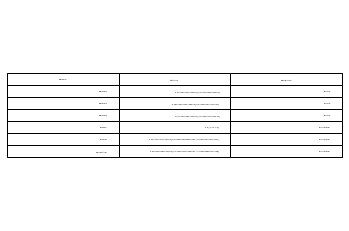

In [62]:
import matplotlib.backends.backend_pdf
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)

cell_text = []
for row in range(len(table)):
    cell_text.append(table.iloc[row])

ax.table(cellText = cell_text, colLabels = table.columns, loc = 'center')
ax.axis('off')

pdf = matplotlib.backends.backend_pdf.PdfPages("output_table.pdf")
pdf.savefig(fig)
pdf.close()